<a href="https://colab.research.google.com/github/justaplan/sales_analysis_tutorial/blob/master/sale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount("/content/gdrive" , force_remount=True)

%cd "/content/gdrive/My Drive/Python/List of CSV"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Python/List of CSV


In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**<h1>Section A. Data Cleaning</h1>**

<h3>1. Drop all NaN and reset Index</h3>

In [5]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<h3>2. Remove Non Date Value in the Date Series</h3>

In [6]:
df = df[df["Order Date"] != "Order Date"]

<h3>3. Convert columns to correct type</h3>

In [7]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"]) # To integer
df["Price Each"] = pd.to_numeric(df["Price Each"]) # To float

**<h1>Section B. Data Augmentation</h1>**

<h3>1. Add Month Column</h3>

In [8]:
## 1st Method - Convert to the DateTime Object
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")

## 2nd Method - Convert to str and gather the month fron the string
# df["Month"] = df["Order Date"].str[0:2]

df["Month"] = pd.DatetimeIndex(df["Order Date"]).month
df["Month"] = df["Month"].astype("int32")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


<h3>2. Add Sales Column</h3>

In [9]:
df["Sale"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


**<h1>Section C. Analysis and Chart<h1>**

<h3>Question 1: What is the best month for sales? How much was earned that month?</h3>

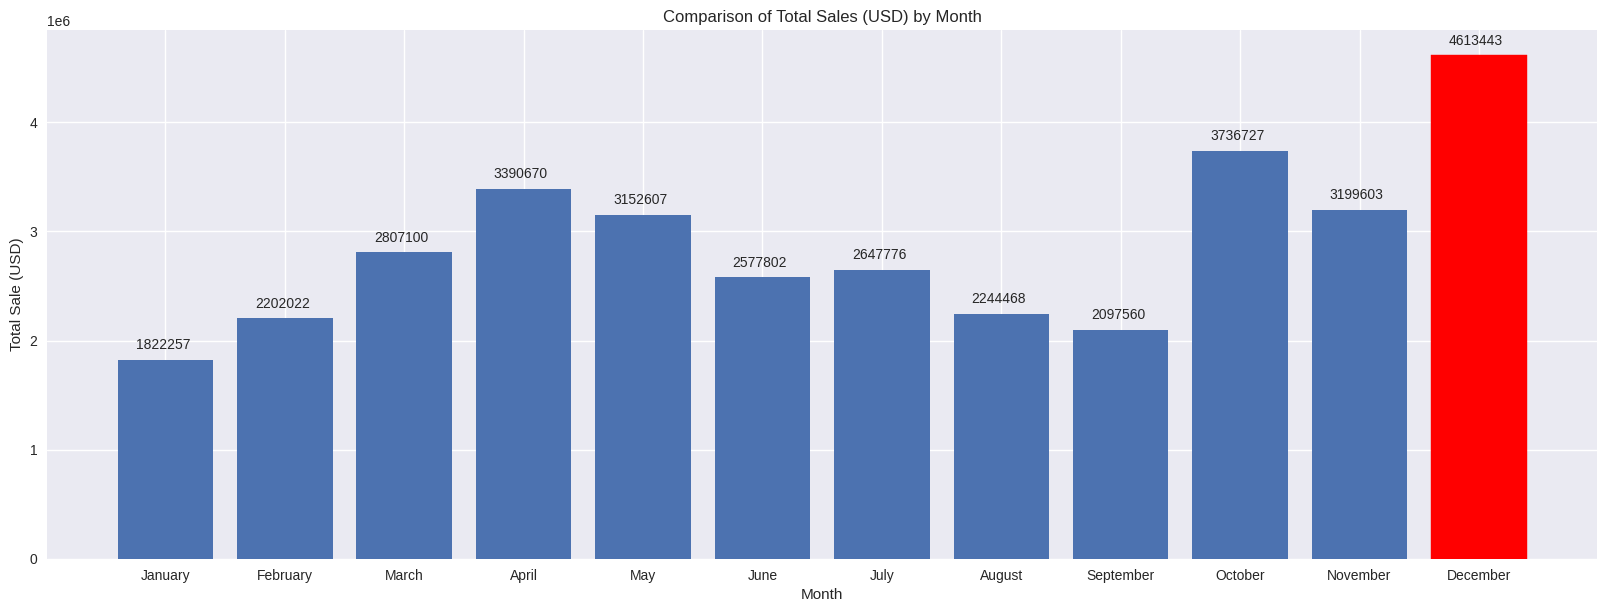

In [40]:
import calendar
months = []
for i in range(1,13):
  months.append(calendar.month_name[i])

total_sale = df.groupby("Month").sum()["Sale"].tolist()

x_indexes = np.arange(len(months))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
sales_bar = plt.bar(x_indexes,total_sale)
sales_bar[-1].set_color("red")

## Chart Value Plotting
for x,y in zip(x_indexes,total_sale):
  plt.text(x - 0.25,y + 100000,s=round(y))

## Chart Title and Labelling
plt.title("Comparison of Total Sales (USD) by Month")
plt.xlabel("Month")
plt.ylabel("Total Sale (USD)")
plt.xticks(x_indexes,months)

plt.show()

<h3>Question 2: What city has highest sale?</h3>

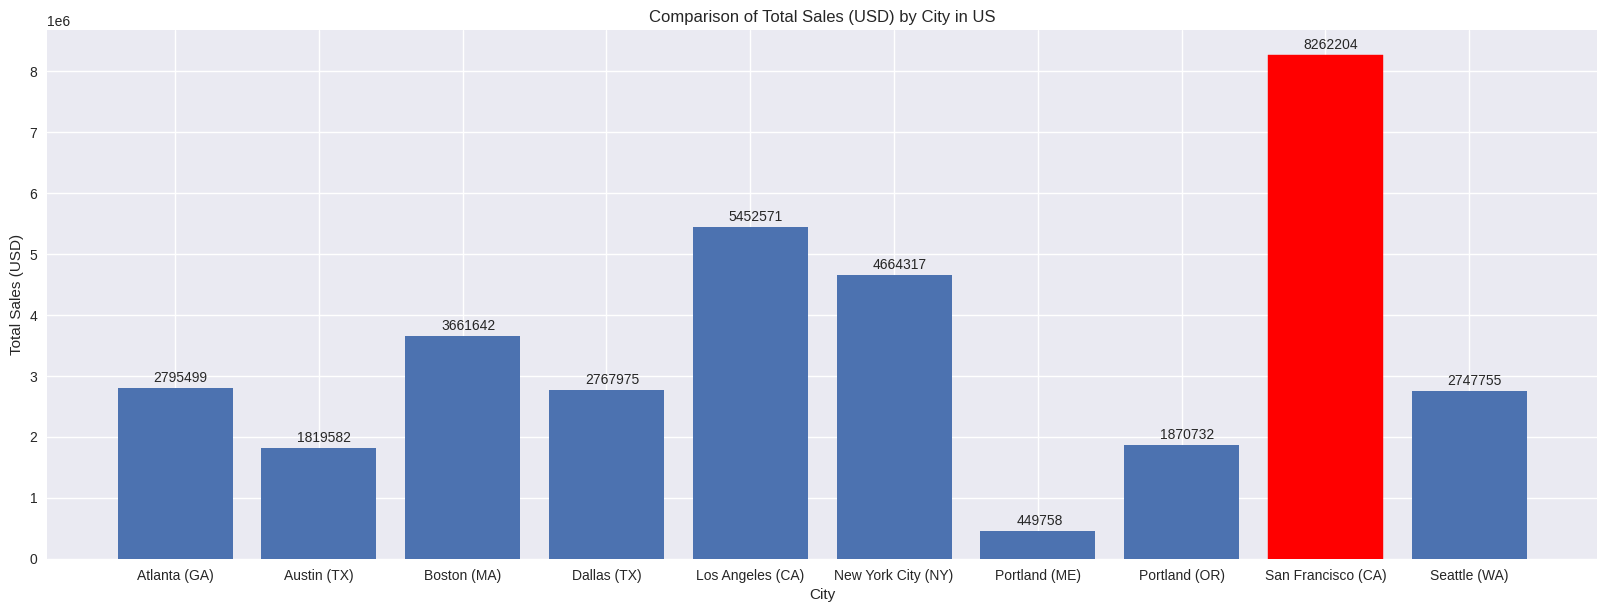

In [63]:
## Keith Galli way
# def get_city(address):
#   return address.split(",")[1].strip()

# def get_state(address):
#   return address.split(",")[2][:3].strip()

# df["City"] = df["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

## Nicky Way
df["City"] = df["Purchase Address"].apply(lambda x : x.split(",")[1].strip()) + " " +"(" + df["Purchase Address"].apply(lambda x : x.split(",")[2][:3].strip()) + ")"

city_name = df.groupby("City").sum().index.tolist()
## city_name = [city for city, df in all_data.groupby("City")] Alternative way
city_sales = df.groupby("City").sum()["Sale"].tolist()

x_indexes = np.arange(len(city_name))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
city_sales_bar = plt.bar(x_indexes,city_sales)
city_sales_bar[-2].set_color("red")

for x,y in zip(x_indexes,city_sales):
  plt.text(x - 0.15,y+100000,s=round(y))

## Chart Title and Label
plt.title("Comparison of Total Sales (USD) by City in US")

plt.xlabel("City")
plt.ylabel("Total Sales (USD)")

plt.xticks(x_indexes,city_name)


plt.show()